In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [32]:
data = pd.read_csv('Stock_dataset.csv')

In [33]:
data

Date    Open    High     Low    Last   Close  \
0     2018-10-08  208.00  222.25  206.85  216.00  215.15   
1     2018-10-05  217.00  218.60  205.90  210.25  209.20   
2     2018-10-04  223.50  227.80  216.15  217.25  218.20   
3     2018-10-03  230.00  237.50  225.75  226.45  227.60   
4     2018-10-01  234.55  234.60  221.05  230.30  230.90   
...          ...     ...     ...     ...     ...     ...   
1230  2013-10-14  160.85  161.45  157.70  159.30  159.45   
1231  2013-10-11  161.15  163.45  159.00  159.80  160.05   
1232  2013-10-10  156.00  160.80  155.85  160.30  160.15   
1233  2013-10-09  155.70  158.20  154.15  155.30  155.55   
1234  2013-10-08  157.00  157.80  155.20  155.80  155.80   

      Total Trade Quantity  Turnover (Lacs)  
0                4642146.0         10062.83  
1                3519515.0          7407.06  
2                1728786.0          3815.79  
3                1708590.0          3960.27  
4                1534749.0          3486.05  
...                    ...              ...  
1230             1281419.0          2039.09  
1231             1880046.0          3030.76  
1232             3124853.0          4978.80  
1233             2049580.0          3204.49  
1234             1720413.0          2688.94  

[1235 rows x 8 columns]

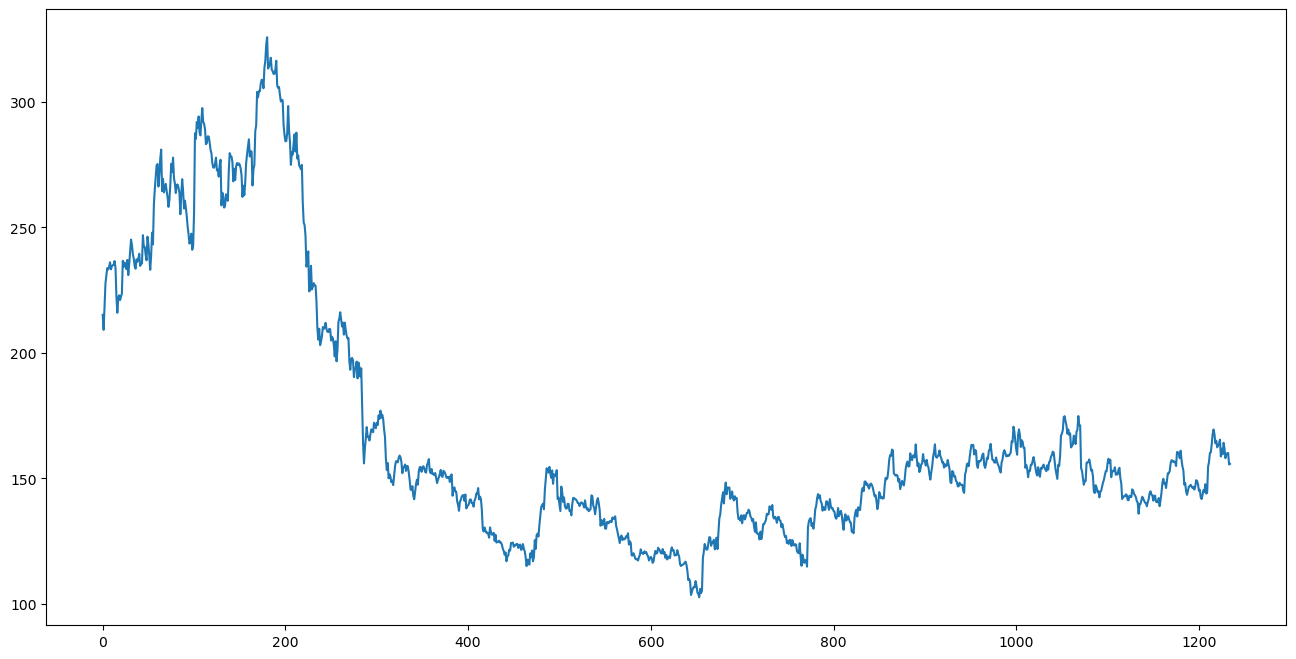

In [34]:
plt.figure(figsize=(16,8))
plt.plot(data['Close'] , label='Closing price')

In [35]:
data['Open - Close'] = data['Open'] - data['Close']
data['High - Low'] = data['High'] - data['Low']
data = data.dropna()

In [36]:
X = data[['Open - Close' , 'High - Low']]
X.head()

Open - Close  High - Low
0         -7.15       15.40
1          7.80       12.70
2          5.30       11.65
3          2.40       11.75
4          3.65       13.55

In [37]:
Y = np.where(data['Close'].shift(-1) > data['Close'],1,-1)

In [38]:
Y

array([-1,  1,  1, ..., -1,  1, -1])

In [39]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(X , Y , test_size = 0.25 , random_state = 44)

In [42]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

knn = KNeighborsClassifier()

params = {'n_neighbors': [3, 5, 7, 9, 11]}

model = GridSearchCV(knn , params , cv=5)

model.fit(x_train , y_train)

accuracy_test = accuracy_score(y_test , model.predict(x_test))
accuracy_train = accuracy_score(y_train , model.predict(x_train))
print('Accuracy test:' , accuracy_test)
print('Accuracy_train :' , accuracy_train)


Accuracy test: 0.8478964401294499
Accuracy_train : 0.8898488120950324


C:\Users\shahe\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\shahe\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

In [43]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

model.fit(x_train_scaled, y_train)
accuracy_test = accuracy_score(y_test, model.predict(x_test_scaled))
print('Scaled test Accuracy:', accuracy_test)


Scaled test Accuracy: 0.86084142394822


C:\Users\shahe\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\shahe\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim